In [3]:
import numpy as np
import pandas as pd

# Data Preprocessing

In [4]:
# Reading the dataset
data = np.loadtxt("train_FD002.txt")

In [5]:
# Preparing the names of the columns

sensor_col_name = ["Sensor "+str(i) for i in range(1,22)]

col_name = ["unit number", "time-cycles", "operational setting 1", "operational setting 2",
            "operational setting 3"] + sensor_col_name

In [6]:
# Converting the array to a dataframe

df = pd.DataFrame(data= data, columns= col_name)

In [8]:
int(df["unit number"].max())

260

In [7]:
# Converting the column to the corect data type
df["unit number"] = df["unit number"].apply(lambda x: int(x))

In [8]:
# A function that creates RUL column associated with each observation
def create_RUL(df, unit_col, cycle_col, total_units):
    
    RUL_list = pd.Series(dtype="int64")
    for unit_i in range(1, total_units+1):
       
        df_subset = df[df[unit_col] == unit_i ]
        max_cycle = max(df_subset[cycle_col])
        
        temp =  max_cycle - df_subset[cycle_col]
        RUL_list = RUL_list.append(temp)

    
    return RUL_list

In [9]:
# Calling the function and adding the column to the dataframe
RUL_series = create_RUL(df, unit_col="unit number", cycle_col= "time-cycles", total_units=260)

df["RUL"] = RUL_series

In [10]:
# Converting the column to the corect data type

df["unit number"] = df["unit number"].apply(lambda x: int(x))

df["time-cycles"] = df["time-cycles"].apply(lambda x: int(x))

df["operational setting 3"] = df["operational setting 3"].apply(lambda x: int(x))

df["RUL"] = df["RUL"].apply(lambda x: int(x))

# Data inspection

In [11]:
df.describe()

,unit number,time-cycles,operational setting 1,operational setting 2,operational setting 3,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,...,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,RUL
count,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,...,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000
mean,131.082981,109.154746,23.998407,0.572056,94.046020,472.910207,579.672399,1419.971013,1205.442024,8.031986,...,2334.557253,8066.597682,9.329654,0.023326,348.309511,2228.806358,97.756838,20.789296,12.473423,108.154746
std,74.463862,69.180569,14.747376,0.310016,14.237735,26.389707,37.289399,105.946341,119.123428,3.613839,...,128.068271,84.837950,0.749335,0.004711,27.754515,145.327980,5.364067,9.869331,5.921615,69.180569
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.530000,1243.730000,1023.770000,3.910000,...,2027.610000,7848.360000,8.335700,0.020000,303.000000,1915.000000,84.930000,10.180000,6.010500,0.000000
25%,68.000000,52.000000,10.004600,0.250700,100.000000,445.000000,549.570000,1352.760000,1123.655000,3.910000,...,2387.900000,8062.140000,8.677800,0.020000,331.000000,2212.000000,100.000000,10.910000,6.546300,51.000000
50%,131.000000,104.000000,25.001300,0.700000,100.000000,462.540000,555.980000,1369.180000,1138.890000,7.050000,...,2388.080000,8082.540000,9.310900,0.020000,335.000000,2223.000000,100.000000,14.880000,8.929200,103.000000
75%,195.000000,157.000000,41.998000,0.840000,100.000000,491.190000,607.340000,1499.370000,1306.850000,10.520000,...,2388.170000,8127.195000,9.386900,0.030000,369.000000,2324.000000,100.000000,28.470000,17.083200,156.000000
max,260.000000,378.000000,42.008000,0.842000,100.000000,518.670000,644.520000,1612.880000,1439.230000,14.620000,...,2390.480000,8268.500000,11.066900,0.030000,399.000000,2388.000000,100.000000,39.340000,23.590100,377.000000


In [12]:
df.shape

(53759, 27)

In [13]:
df.isna().sum().sum()

0

## Spliting the data into features and variables

In [14]:
df.columns

Index(['unit number', 'time-cycles', 'operational setting 1',
       'operational setting 2', 'operational setting 3', 'Sensor 1',
       'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5', 'Sensor 6', 'Sensor 7',
       'Sensor 8', 'Sensor 9', 'Sensor 10', 'Sensor 11', 'Sensor 12',
       'Sensor 13', 'Sensor 14', 'Sensor 15', 'Sensor 16', 'Sensor 17',
       'Sensor 18', 'Sensor 19', 'Sensor 20', 'Sensor 21', 'RUL'],
      dtype='object')

In [15]:
X = df[['operational setting 1',
       'operational setting 2', 'operational setting 3', 'Sensor 1',
       'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5', 'Sensor 6', 'Sensor 7',
       'Sensor 8', 'Sensor 9', 'Sensor 10', 'Sensor 11', 'Sensor 12',
       'Sensor 13', 'Sensor 14', 'Sensor 15', 'Sensor 16', 'Sensor 17',
       'Sensor 18', 'Sensor 19', 'Sensor 20', 'Sensor 21',]]

y = df["RUL"]

In [16]:
print("X shape : {}, y shape: {}".format(X.shape, y.shape))

X shape : (53759, 24), y shape: (53759,)


## Test Train split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Machine Learning models

In the following blocks of code, different machine learning models will be inspected to predict RUL. 

- Random Forest Regresson
- Support Vector Regression
- Elastic Net regression

## Random Forest Regression

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
rfr = RandomForestRegressor()

In [21]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
y_pred = rfr.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [24]:
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print("RMSE = {:.4f} and MAE = {:.4f}".format(np.sqrt(MSE), MAE))

RMSE = 43.3479 and MAE = 31.5413


### Exploring the features

In [25]:
features_importance = rfr.feature_importances_

In [26]:
import matplotlib.pyplot as plt

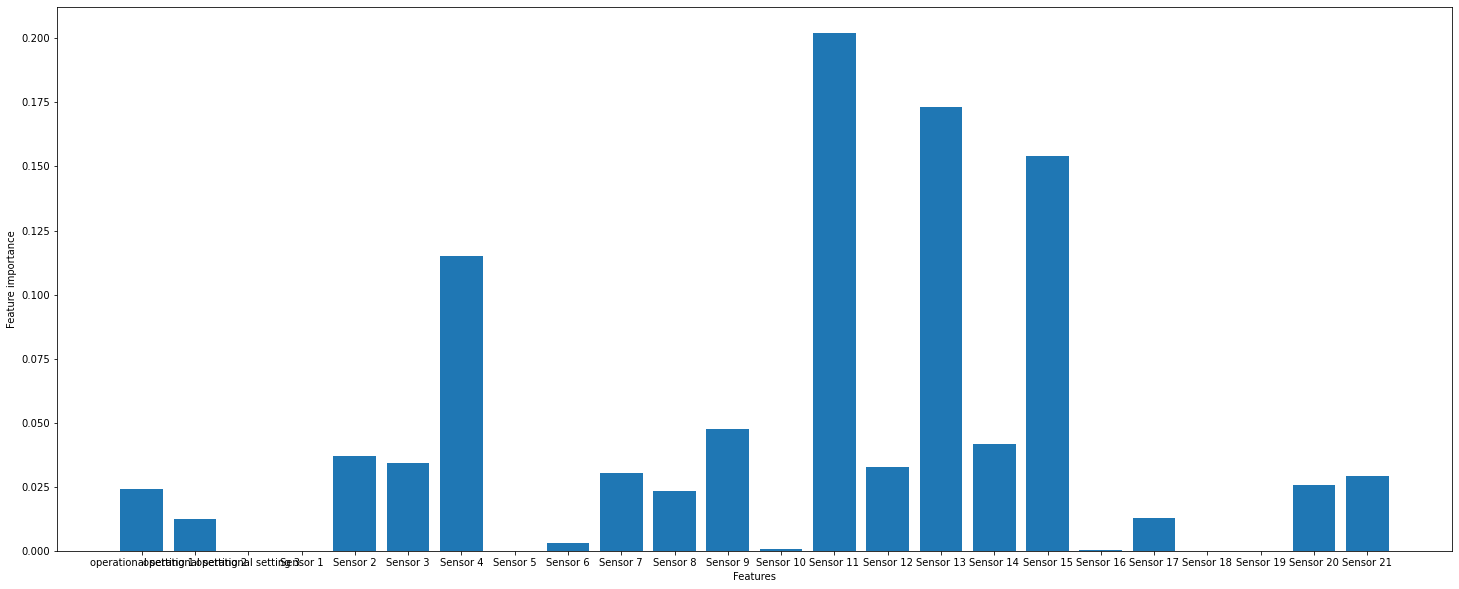

In [48]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax.bar(x= X.columns ,height= features_importance)
plt.ylabel("Feature importance")
plt.xlabel("Features")
plt.savefig("Feature_imporance.png")
plt.show()

From the previos plot we can notice that not all the features are important. We could assume that a better model could be built using random forest regression by chosing better features.

# SVR

In [28]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [29]:
pipl = make_pipeline(StandardScaler(), SVR())

In [30]:
pipl.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [31]:
y_pred = pipl.predict(X_test)

In [32]:
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print("RMSE = {:.4f} and MAE = {:.4f}".format(np.sqrt(MSE), MAE))

RMSE = 60.9766 and MAE = 48.4673


# ElasticNet

In [33]:
from sklearn.linear_model import ElasticNet

In [38]:
regr = make_pipeline(StandardScaler(),
                    ElasticNet(random_state=0))

In [39]:
regr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet(random_state=0))])

In [40]:
y_hat = regr.predict(X_test)

In [41]:
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print("RMSE = {:.4f} and MAE = {:.4f}".format(np.sqrt(MSE), MAE))

RMSE = 60.9766 and MAE = 48.4673
